1. The data were collected from [Lending Club](https://www.lendingclub.com/) between 2007 and 2017. The dataset was downloaded from [Kaggle](https://www.kaggle.com/wordsforthewise/lending-club).

**1. imports**

In [1]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

#set globally printing options
pd.set_option('display.max_colwidth', 1000, 'display.max_columns', None, 'display.max_rows', None)

#import os

**2. Load the cleaned data**

In [2]:
#merge = pd.read_csv(r'C:\\Users\dongw\OneDrive\Documents\2. Programming\Springboard\DS\Lending Club Loan\data\df_merge_cleaned.csv')
df = pd.read_csv(r'C:\\Users\dongw\OneDrive\Documents\2. Programming\Springboard\DS\Lending Club Loan\data\df_acce_cleaned.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_int,application_type,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36,13.99,123.03,C,C4,10,MORTGAGE,55000.0,2015-12-01,Fully Paid,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,30.0,7.0,2765.0,29.7,13.0,3600.0,821.72,Individual,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,76.9,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36,11.99,820.28,C,C1,10,MORTGAGE,65000.0,2015-12-01,Fully Paid,small_business,SD,16.06,1.0,715.0,719.0,4.0,6.0,22.0,21470.0,19.2,38.0,24700.0,979.66,Individual,204396.0,111800.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,2.0,97.4,7.7,314017.0,39475.0,79300.0,24667.0
2,20000.0,60,10.78,432.66,B,B4,10,MORTGAGE,63000.0,2015-12-01,Fully Paid,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,NaN,6.0,7869.0,56.2,18.0,20000.0,2705.92,Joint App,189699.0,14000.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,60,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,Fully Paid,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,12.0,21929.0,64.5,35.0,10400.0,1340.50,Individual,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,36,13.44,405.18,C,C3,4,RENT,34000.0,2015-12-01,Fully Paid,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,NaN,5.0,8822.0,68.4,6.0,11950.0,1758.95,Individual,12798.0,12900.0,0.0,2560.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,100.0,100.0,16900.0,12798.0,9400.0,4000.0


In [4]:
df.shape

(1369566, 56)

In [5]:
df.info()
#it is shown issue_d datatype is object, will convert to datetime, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369566 entries, 0 to 1369565
Data columns (total 56 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1369566 non-null  float64
 1   term                        1369566 non-null  int64  
 2   int_rate                    1369566 non-null  float64
 3   installment                 1369566 non-null  float64
 4   grade                       1369566 non-null  object 
 5   sub_grade                   1369566 non-null  object 
 6   emp_length                  1369566 non-null  int64  
 7   home_ownership              1369566 non-null  object 
 8   annual_inc                  1369562 non-null  float64
 9   issue_d                     1369566 non-null  object 
 10  loan_status                 1369566 non-null  object 
 11  purpose                     1369566 non-null  object 
 12  addr_state                  1369566 non-null  object 
 1

**3. check loan numbers and default rate under differenct categories**

In [6]:
#convert issue date to date format,this feature is unknow before issues the loan, it actually not useful for predict default
df.issue_d = pd.to_datetime(df.issue_d)

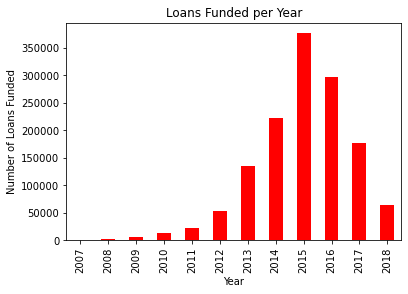

In [7]:
_ = pd.value_counts(df['issue_d'].dt.year).sort_index().plot.bar(color='r')
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Loans Funded')
_ = plt.title('Loans Funded per Year')

From 2013 to 2017, the lending clud has issued much more loans than the other years, where 2015 has the peak.

In [8]:
# convert response variable loan_status to 0/1 variables, where 0 indicate fully paid, and 1 indicate Default.
df['Default'] = df['loan_status'].map({'Fully Paid' : 0, 'Default': 1})

we want to check how default and non-default look like group by different categories, they were also included in the Data wrangling notebook.

In [9]:
#select the category variables
df.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'loan_status', 'purpose',
       'addr_state', 'application_type'],
      dtype='object')

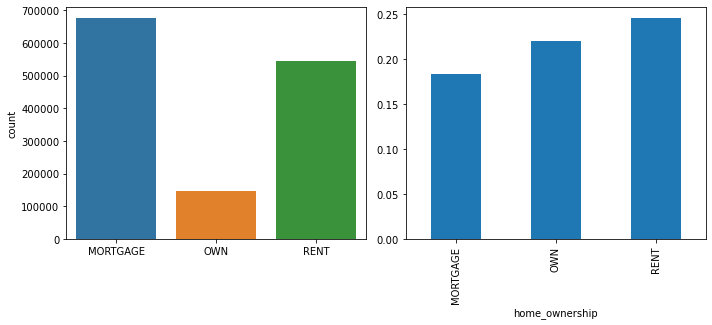

In [10]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.countplot(sorted(df.home_ownership))

plt.subplot(2, 2, 2)
df.groupby('home_ownership')['Default'].mean().plot.bar()

plt.tight_layout()

#Most of people have a house mortgage, but shows lower default rate

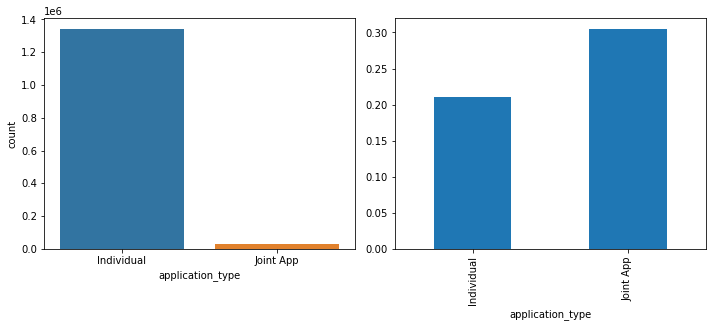

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.countplot(df.application_type)

plt.subplot(2, 2, 2)
df.groupby('application_type')['Default'].mean().plot.bar()

plt.tight_layout()

#There are more individual application types but joint applications has higher default rates.

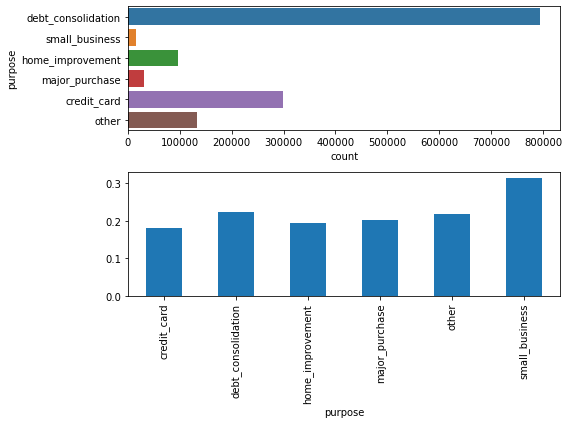

In [15]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
sns.countplot(y = df.purpose)

plt.subplot(2, 1, 2)
df.groupby('purpose')['Default'].mean().plot.bar()

plt.tight_layout()

# debt_consolidation is the most common type, and small business shows a higher default rate

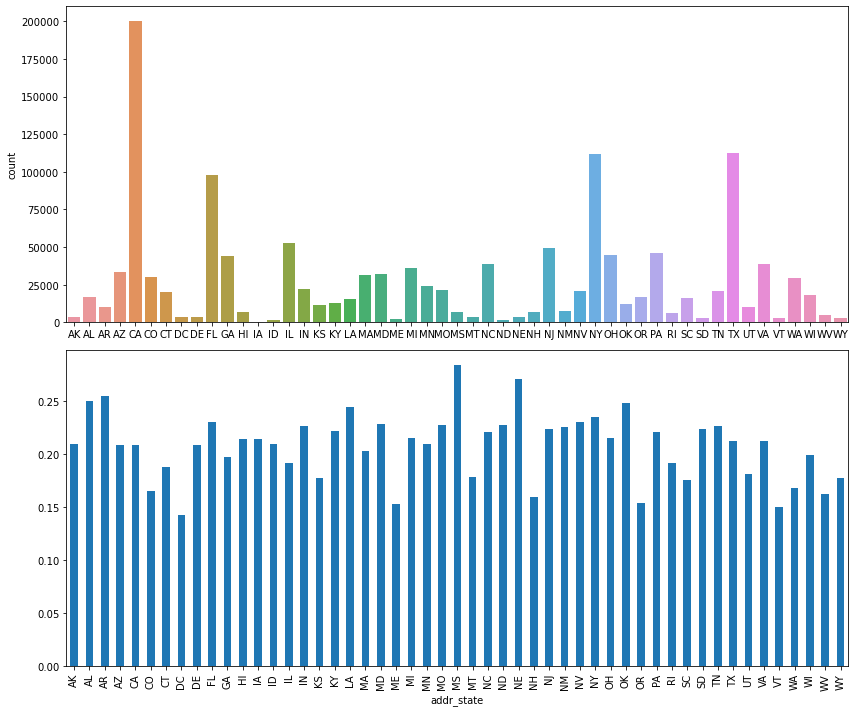

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.countplot(sorted(df.addr_state))

plt.subplot(2, 1, 2)
df.groupby('addr_state')['Default'].mean().sort_index().plot.bar()

plt.tight_layout()
#CA has the most of loans funded, but doesnt have high default rate. 

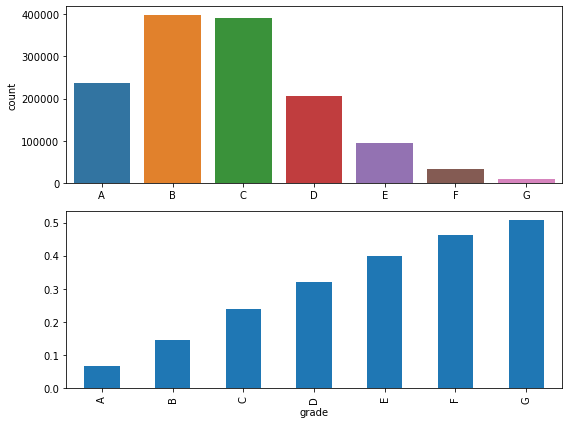

In [13]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
sns.countplot(sorted(df.grade))

plt.subplot(2, 1, 2)
df.groupby('grade')['Default'].mean().sort_index().plot.bar()

plt.tight_layout()
plt.show()

#most of the grade are B and C, with the lower grade is, there are more likely default, there are 25 rank to decide base risk. 
#the rank calculation happens after the borrower applying the loan, so they might not be useful for model prediction.

**4. Multicollinearity**

identify features that highly correlated, and avoid redundancy, and we attempt to use the most importance features 

In [17]:
df_cat = df.select_dtypes('object').columns.tolist()
df_cat

['grade',
 'sub_grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'addr_state',
 'application_type']

In [18]:
#discrete variables & datetime 
df_dis = ['issue_d', 'term', 'emp_length', 'Default', 'total_rec_prncp']

In [19]:
# subset df with only numeric variables to calculate correlations
non_nu = df_cat + df_dis
df_nu = df [[c for c in df.columns if c not in non_nu]]

In [20]:
#call the .corr() method on df_nu to look at all the correlations between techniquecally continous numeric variables. 
#As the documentation shows, the correlation coefficient is the Pearson correlation coefficient 
df_nu.corr().head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_rec_int,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.142288,0.953082,0.309704,0.032266,-0.002373,0.101671,0.101671,-0.019272,-0.022286,0.185884,0.314827,0.106517,0.207959,0.625350,0.314061,0.313977,0.009850,0.229045,0.198687,0.051282,0.122838,0.163086,0.047103,0.024148,0.222800,0.031127,-0.000804,-0.050012,0.194699,0.151751,0.214244,0.196490,0.077965,0.166153,0.169798,0.151085,0.182592,-0.020170,0.088380,0.020534,0.334489,0.275585,0.371308,0.200281
int_rate,0.142288,1.000000,0.155344,-0.071455,0.146068,0.047943,-0.403531,-0.403528,0.209650,-0.029050,-0.004268,-0.028229,0.240696,-0.043141,0.404858,-0.084949,-0.161939,0.189410,-0.084150,-0.279752,0.251333,-0.071307,-0.138239,-0.106558,-0.127580,-0.084477,-0.084478,-0.167838,0.043068,0.022434,0.085433,-0.054220,-0.084570,0.011214,-0.009240,-0.057698,0.085264,-0.009760,0.206953,-0.063691,0.248452,-0.118580,0.004378,-0.228236,-0.002983
installment,0.953082,0.155344,1.000000,0.300604,0.036007,0.006925,0.051540,0.051539,0.002733,-0.028941,0.176241,0.303646,0.125192,0.184997,0.559727,0.283589,0.288899,0.023308,0.202886,0.165364,0.073348,0.101810,0.142956,0.033141,0.015108,0.189834,0.018222,-0.015001,-0.041419,0.197837,0.159249,0.206882,0.183646,0.061855,0.162045,0.157889,0.158397,0.171813,0.000124,0.070895,0.040161,0.301801,0.260305,0.339266,0.185527
annual_inc,0.309704,-0.071455,0.300604,1.000000,-0.138937,0.040756,0.070022,0.070022,0.031542,-0.040600,0.134694,0.284877,0.035482,0.175214,0.138044,0.395473,0.272829,0.056788,0.305553,0.157314,-0.003113,0.111451,0.129867,0.031857,-0.026053,0.212413,0.027114,-0.041409,0.016959,0.104043,0.072910,0.122042,0.126063,0.100816,0.078489,0.101622,0.071803,0.132018,0.052381,-0.007148,-0.016449,0.408622,0.314981,0.268167,0.261800
dti,0.032266,0.146068,0.036007,-0.138937,1.000000,-0.008010,-0.060179,-0.060181,-0.009492,0.008631,0.222317,0.107668,0.139436,0.171562,0.066513,0.005774,0.054343,0.118039,-0.084593,-0.058951,0.142585,0.035753,0.033443,-0.018578,-0.072994,-0.028703,-0.006491,-0.000460,-0.033445,0.126553,0.189443,0.078995,0.050379,0.172761,0.135692,0.098367,0.191549,0.215250,0.068989,0.072107,0.127605,0.015032,0.223639,0.026600,0.252266


<AxesSubplot:>

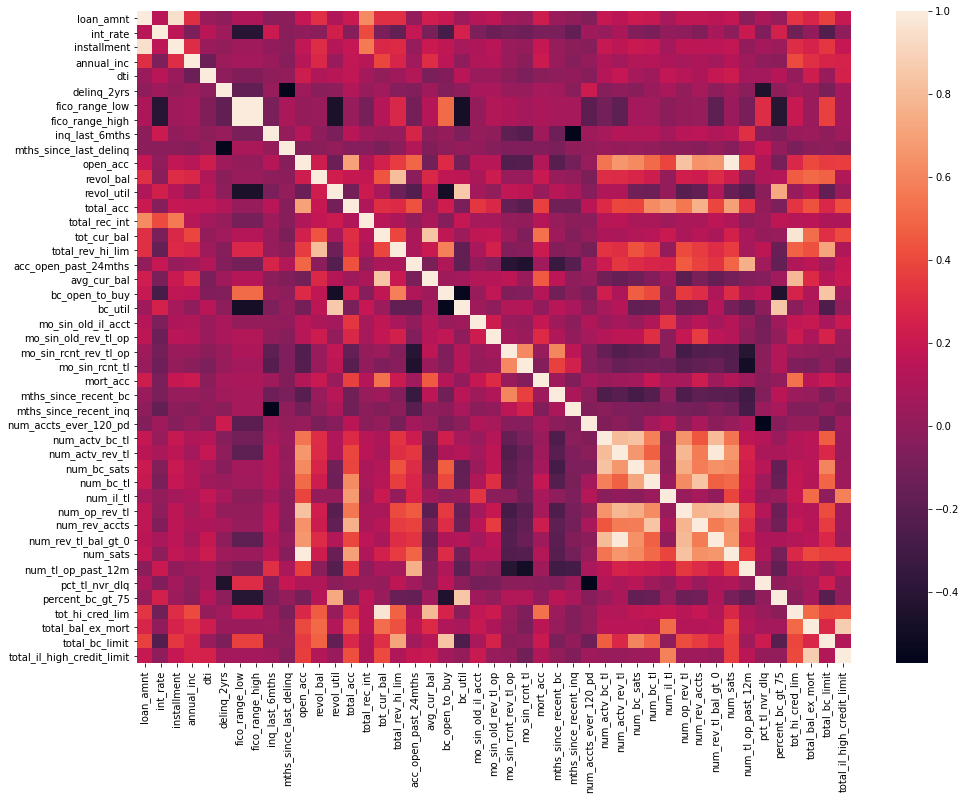

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_nu.corr())

There are some variables are highly correlated, we want to pull them out

In [22]:
# stackoverflow_Aran: a function to to find the most correlated pairs and avoid duplicate and self correlations with proper sorting
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [23]:
#the highly correlated paris are higher than or equal to 0.9 is shown below
top_corr = get_top_abs_correlations(df_nu, 10)
top_corr = top_corr[top_corr >= 0.9].dropna()
top_corr

fico_range_low   fico_range_high        1.000000
open_acc         num_sats               0.998736
num_actv_rev_tl  num_rev_tl_bal_gt_0    0.981991
tot_cur_bal      tot_hi_cred_lim        0.972975
loan_amnt        installment            0.953082
dtype: float64

<AxesSubplot:xlabel='fico_range_low', ylabel='fico_range_high'>

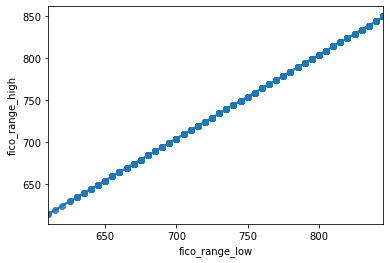

In [24]:
#remove one of the variables
sns.regplot(x='fico_range_low', y='fico_range_high', data=df_nu)

<AxesSubplot:xlabel='open_acc', ylabel='num_sats'>

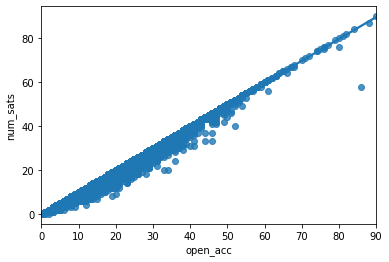

In [25]:
#drop one of the variables
sns.regplot(x='open_acc', y='num_sats', data=df_nu)

<AxesSubplot:xlabel='num_actv_rev_tl', ylabel='num_rev_tl_bal_gt_0'>

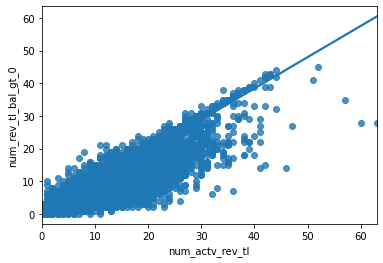

In [26]:
# drop one of the variables
sns.regplot(x='num_actv_rev_tl', y='num_rev_tl_bal_gt_0', data=df_nu)

<AxesSubplot:xlabel='tot_cur_bal', ylabel='tot_hi_cred_lim'>

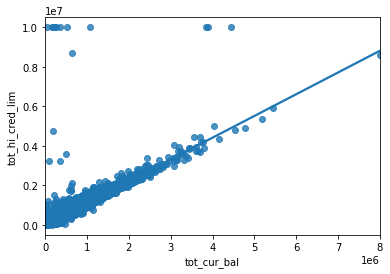

In [27]:
#drop one of the variables
sns.regplot(x='tot_cur_bal', y='tot_hi_cred_lim', data=df_nu)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

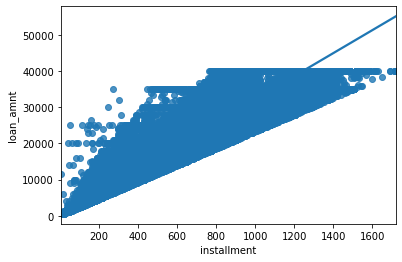

In [28]:
#althought installment is highly correlated with loan_amnt, there is a wide range of loan amount from about 400 to 1000 installment, we keep both so far
sns.regplot(x='installment', y='loan_amnt', data=df_nu)

In [29]:
# the highly correlated pairs will decrease the importantce of each other and we hope to apply less features for creating a model
drop_nu = ['fico_range_high','num_sats', 'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim']
df = df[[c for c in df.columns if c not in drop_nu]]

**5.We will test if Default because it has different loan_amnt from Non-default, Null hypothesis will be there is no difference between the two groups.**
scipy.stats.ttest_ind: will used to test if 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [30]:
#subset the Default and Fu_paid group for convinence
Default = df[df['Default'] == 1]
Fu_paid = df[df['Default'] == 0]

In [31]:
#extract numeric variables 
Default_nu = Default[[c for c in Default.columns if c not in non_nu]]

In [32]:
#extract numeric variables
Fu_paid_nu = Fu_paid[[c for c in Fu_paid.columns if c not in non_nu]]

In [33]:
Fu_paid_nu.columns == Default_nu.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [34]:
Ttest_results = pd.DataFrame()

In [35]:
for col in Default_nu.columns:
    Ttest_result = []
    a = Default_nu[col].values
    b = Fu_paid_nu[col].values
    Ttest_result.append(stats.ttest_ind(a, b, nan_policy='omit', equal_var = False))
    Ttest_results.loc[col, 'statistic'] = list(Ttest_result)[0][0]
    Ttest_results.loc[col, 'pvalue'] = list(Ttest_result)[0][1]

In [36]:
sig_pvalue = Ttest_results[Ttest_results['pvalue'] < 0.05]
sig_pvalue.sort_values('pvalue')
# total_il_high_credit_limit is the only variable has pvalue > 0.05, so we accept the null hypothesis- there is no difference between the two groups.

,statistic,pvalue
loan_amnt,82.628150,0.000000e+00
percent_bc_gt_75,70.435980,0.000000e+00
num_tl_op_past_12m,92.231393,0.000000e+00
num_actv_rev_tl,74.902914,0.000000e+00
num_actv_bc_tl,45.128793,0.000000e+00
mths_since_recent_inq,-62.836885,0.000000e+00
mths_since_recent_bc,-62.848329,0.000000e+00
mort_acc,-97.633146,0.000000e+00
mo_sin_rcnt_tl,-65.873112,0.000000e+00
mo_sin_rcnt_rev_tl_op,-64.842657,0.000000e+00
